In [191]:
print('Variant:' +  str(ord("Y") % 3 + 1))

Variant:3


In [193]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [195]:
import numpy as np

Assignment 1

In [198]:
import csv

In [200]:
def get_column_values(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        col_index = header.index(column_name)
        data = np.array([row[col_index] for row in reader], dtype=int)
        
        return data

Assignment 2

In [203]:
apc_values = get_column_values('russia_losses_equipment.csv', 'APC')

print(apc_values)

[18111 18072 18053 18002 17969 17939 17895 17876 17827 17800 17765 17751
 17740 17710 17679 17658 17627 17596 17579 17547 17503 17476 17438 17396
 17344 17304 17292 17252 17222 17170 17132 17093 17080 17077 17071 17063
 17043 17003 16955 16938 16925 16906 16897 16878 16878 16869 16848 16821
 16786 16760 16736 16722 16699 16681 16667 16648 16631 16620 16599 16567
 16542 16521 16495 16480 16473 16461 16426 16402 16385 16368 16363 16350
 16341 16332 16323 16294 16286 16255 16238 16211 16203 16161 16141 16103
 16095 16074 16050 16039 16013 16000 15980 15963 15917 15902 15883 15871
 15862 15826 15811 15779 15755 15732 15715 15704 15685 15645 15629 15611
 15600 15583 15566 15550 15524 15505 15480 15459 15450 15431 15413 15398
 15383 15372 15337 15319 15307 15287 15269 15263 15234 15208 15187 15176
 15144 15131 15105 15096 15076 15036 15020 15002 14980 14947 14935 14913
 14891 14858 14818 14803 14786 14775 14748 14721 14699 14665 14630 14595
 14552 14538 14508 14460 14417 14375 14353 14313 14

Assignment 3

In [206]:
import pandas as pd

def get_column_values(filename, column_name):
    data = pd.read_csv(filename)
    return data[column_name].values


In [208]:
import pandas as pd
import numpy as np

def find_daily_losses(filename, column_name="APC"):
    data = pd.read_csv(filename)
    apc_values = data[column_name].values
    daily_losses = np.diff(apc_values)
    return daily_losses


In [210]:
print(find_daily_losses('russia_losses_equipment.csv'))

[ -39  -19  -51  -33  -30  -44  -19  -49  -27  -35  -14  -11  -30  -31
  -21  -31  -31  -17  -32  -44  -27  -38  -42  -52  -40  -12  -40  -30
  -52  -38  -39  -13   -3   -6   -8  -20  -40  -48  -17  -13  -19   -9
  -19    0   -9  -21  -27  -35  -26  -24  -14  -23  -18  -14  -19  -17
  -11  -21  -32  -25  -21  -26  -15   -7  -12  -35  -24  -17  -17   -5
  -13   -9   -9   -9  -29   -8  -31  -17  -27   -8  -42  -20  -38   -8
  -21  -24  -11  -26  -13  -20  -17  -46  -15  -19  -12   -9  -36  -15
  -32  -24  -23  -17  -11  -19  -40  -16  -18  -11  -17  -17  -16  -26
  -19  -25  -21   -9  -19  -18  -15  -15  -11  -35  -18  -12  -20  -18
   -6  -29  -26  -21  -11  -32  -13  -26   -9  -20  -40  -16  -18  -22
  -33  -12  -22  -22  -33  -40  -15  -17  -11  -27  -27  -22  -34  -35
  -35  -43  -14  -30  -48  -43  -42  -22  -40  -32  -35  -19  -14  -34
  -23  -27  -33  -29  -21  -39  -16  -20  -14  -15  -14  -12  -12   -8
  -23  -21  -17   -8  -18  -13  -31  -20  -47  -19  -12  -47  -45  -24
  -54 

Assignment 4

In [213]:
def find_top_5_losses(filename, column_name="APC"):
     daily_losses = find_daily_losses(filename, column_name)
     top_5_losses = np.sort(daily_losses)[:5]
    
     return top_5_losses[::1]

In [215]:
print(find_top_5_losses('russia_losses_equipment.csv'))

[-190 -120 -110  -96  -91]


Assignment 5

In [218]:
from datetime import datetime

In [220]:
def get_dates(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        
        try:
            date_col_index = header.index("date")
        except ValueError:
            raise ValueError(f"Column 'date' not found.")
        
        dates = []
        for row in reader:
            try:
                date = datetime.strptime(row[date_col_index], "%Y-%m-%d")
                dates.append(date)
            except ValueError:
                continue
        
        return np.array(dates)

In [222]:
def apc_losses_in_summer(filename, column_name="APC"):
    daily_losses = get_column_values(filename, column_name)
    
    dates = get_dates(filename)
    
    summer_mask = (dates >= datetime(2024, 6, 1)) & (dates <= datetime(2024, 8, 31))
    summer_losses = daily_losses[summer_mask]
    
    total_summer_losses = np.sum(summer_losses)
    
    return total_summer_losses

In [224]:
print(apc_losses_in_summer('russia_losses_equipment.csv'))

1459103


Assignment 6

In [227]:
def find_mean_losses(filename, start_day=100, end_day=500, column_name="APC"):
    daily_losses = get_column_values(filename, column_name)
    
    selected_losses = daily_losses[start_day-1:end_day]
    
    mean_losses = np.mean(selected_losses)
    
    return int(mean_losses)

In [229]:
print(find_mean_losses('russia_losses_equipment.csv'))

11220


Assignment 7

In [231]:
!pip install matplotlib

In [232]:
import matplotlib.pyplot as plt

In [233]:
def plot_last_200_apc_losses(filename, column_name="APC"):
    daily_losses = get_column_values(filename, column_name)
    
    dates = get_dates(filename)
    
    last_200_losses = daily_losses[-200:]
    last_200_dates = dates[-200:]
    
    plt.figure(figsize=(8, 16), dpi=100)
    
    plt.plot(last_200_dates, last_200_losses, linestyle='--', color='c', label="APC losses")
    
    plt.title("APC Losses Over Last 200 Days", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Number of APC Destroyed", fontsize=12)
    
    plt.grid(True, which='both', linestyle=':', color='black')
    
    plt.legend(loc="upper right")
    
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.savefig('apc_losses_last_200_days.png', format='png')
    
    plt.show()

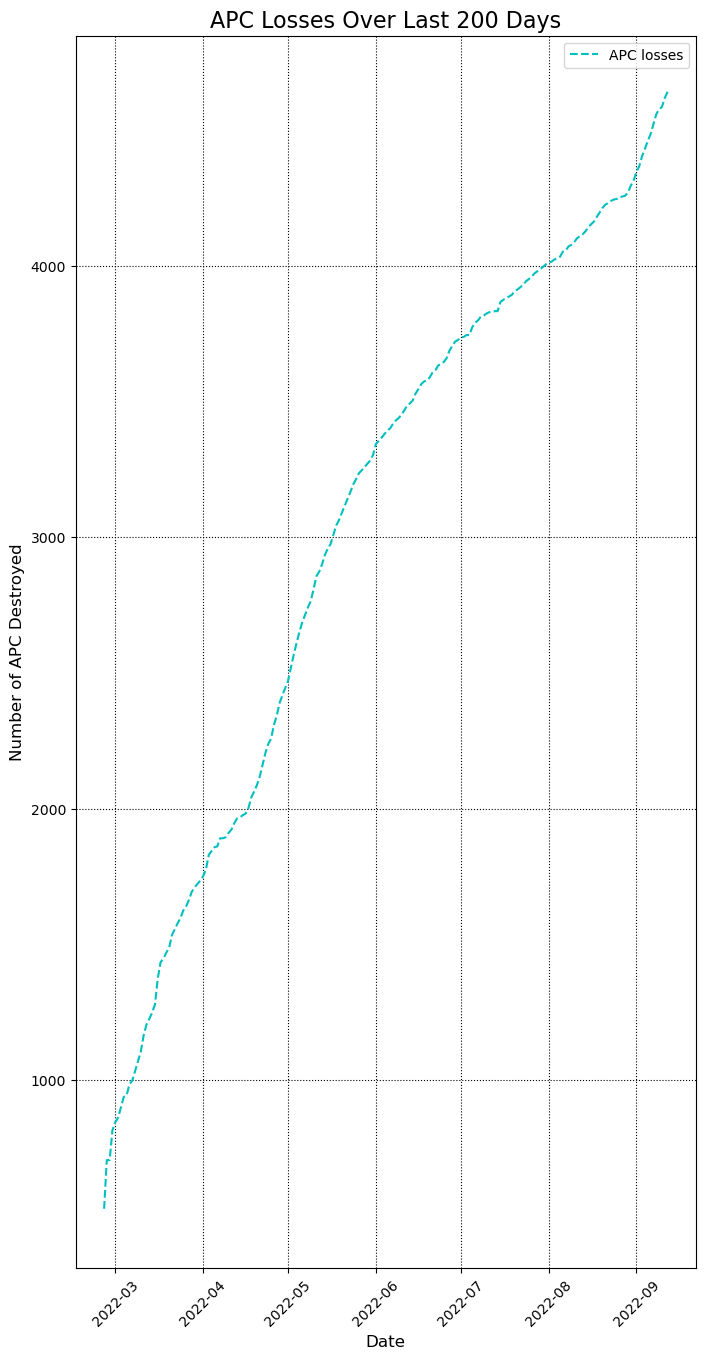

In [237]:
plot_last_200_apc_losses('russia_losses_equipment.csv')